### These plots will focus on the new 2-way nested runs with UCM = 0 and 1 only.

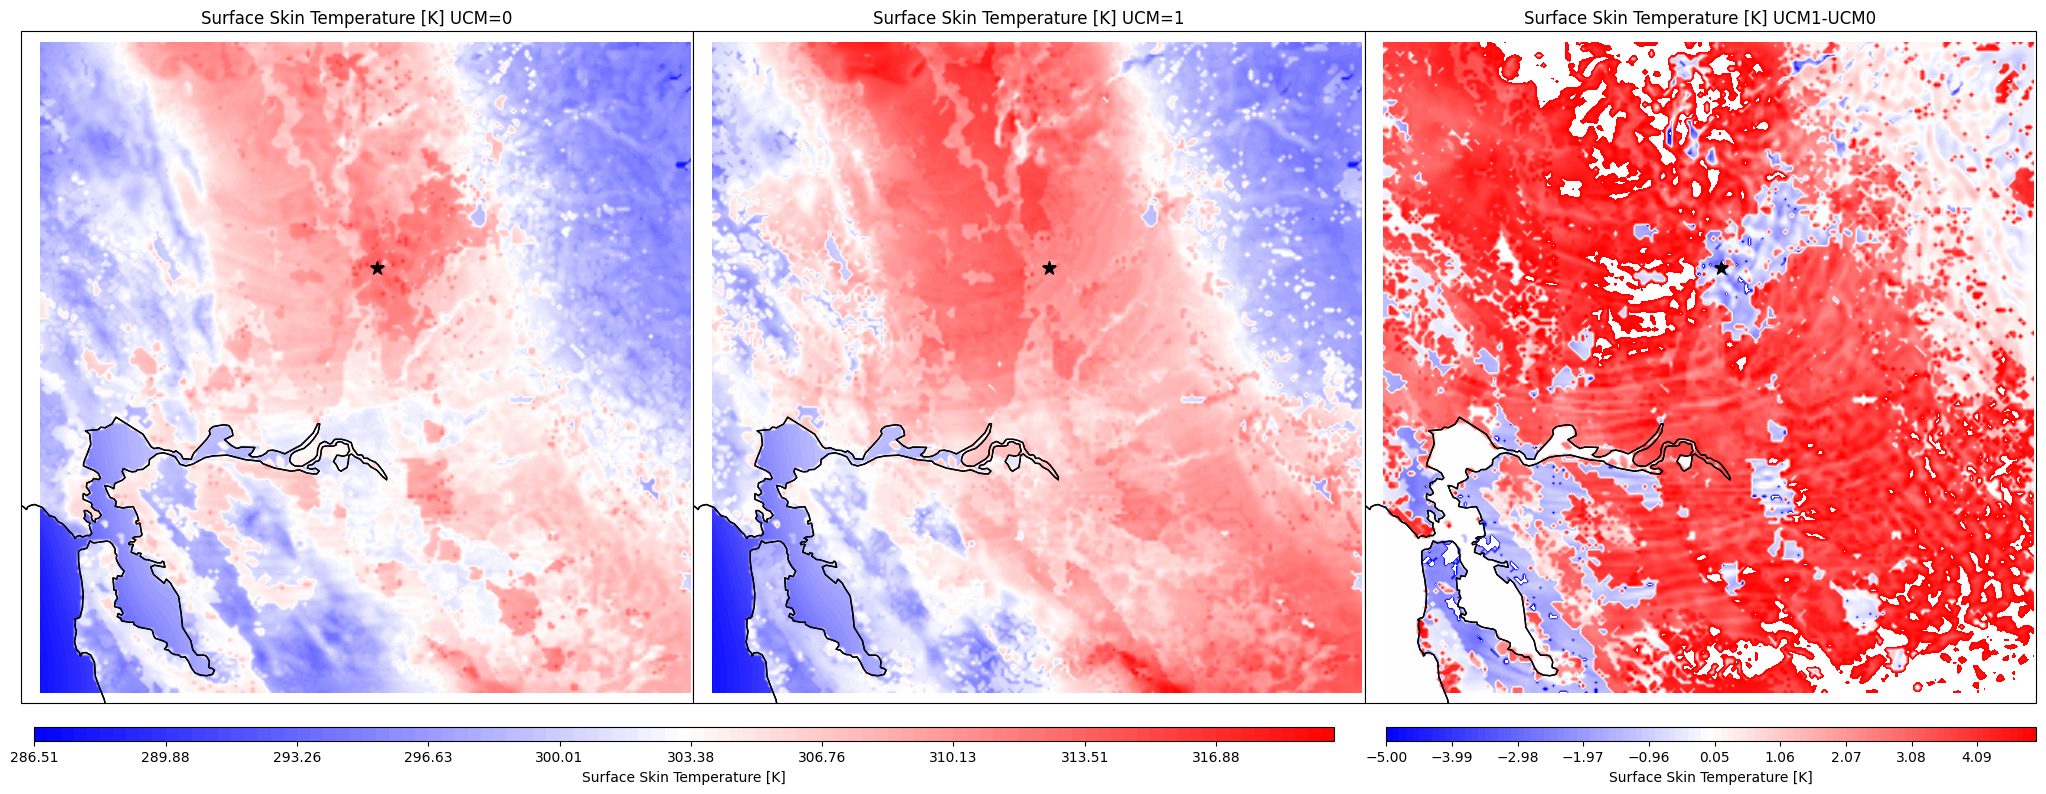

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords, ll_to_xy, vertcross, interplevel,ALL_TIMES
import cartopy as cp
from glob import glob

# Open the NetCDF file
ncfile0 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_UCM1/wrfout_d01_2020-06-06_21:00:00")
ncfile1 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_PBL1/wrfout_d01_2020-06-06_21:00:00")
### Set the Variable you want to look at. ####
Var = "TSK"
VarLabel = "Surface Skin Temperature [K]"
Var0 = getvar(ncfile0, Var)
Var1 = getvar(ncfile1, Var)

wrf_proj = get_cartopy(Var0)
lats, lons = latlon_coords(Var0)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.0}, figsize=(26, 9))

# Add shared colorbar spanning only the width of both plots
levels = np.linspace(np.min([to_np(Var0).min(),to_np(Var1).min()]),
                     np.max([to_np(Var0).max(),to_np(Var1).max()]), 100)

#  contour plot for UCM=0
ax0.set_title(VarLabel+ " UCM=0")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
center_lon, center_lat = -121.49, 38.58
lon_min, lon_max = center_lon - 0.3, center_lon + 0.3
lat_min, lat_max = center_lat - 0.25, center_lat + 0.25
#ax0.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats),to_np(Var0),transform=cp.crs.PlateCarree(), cmap="bwr",levels=levels) 
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())


#  contour plot for UCM=1 
ax1.set_title(VarLabel+ " UCM=1")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
#ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var1),transform=cp.crs.PlateCarree(), cmap="bwr",levels=levels) 
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

cbar_ax1 = fig.add_axes([0.13, 0.08, 0.5, 0.015])  # [left, bottom, width, height]
cbar1 = fig.colorbar(contour0, cax=cbar_ax1, orientation="horizontal")
cbar1.set_label(VarLabel)

#  contour plot for UCM= (1-0)
ax2.set_title(VarLabel+ " UCM1-UCM0")
ax2.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons), to_np(lats), to_np(Var1)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="bwr",levels=np.linspace(-5,5,100)) 
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())
# Add shared colorbar spanning only the width of both plots
cbar_ax2 = fig.add_axes([0.65, 0.08, 0.25, 0.015])  # [left, bottom, width, height]
cbar2 = fig.colorbar(contour2, cax=cbar_ax2, orientation="horizontal")
cbar2.set_label(VarLabel)

plt.show()

Unique IVGTYP values: [17 24 26 27 28 29 30 32 33 37 38 39 40]
Unique IVGTYP values: [13 17 24 26 27 28 29 30 32 33 37 38 39 40]
Unique LU_INDEX values: [17. 23. 24. 25. 26. 27. 28. 29. 30. 32. 33. 37. 38. 39. 40.]
Unique LU_INDEX values: [13. 17. 23. 24. 25. 26. 27. 28. 29. 30. 32. 33. 37. 38. 39. 40.]


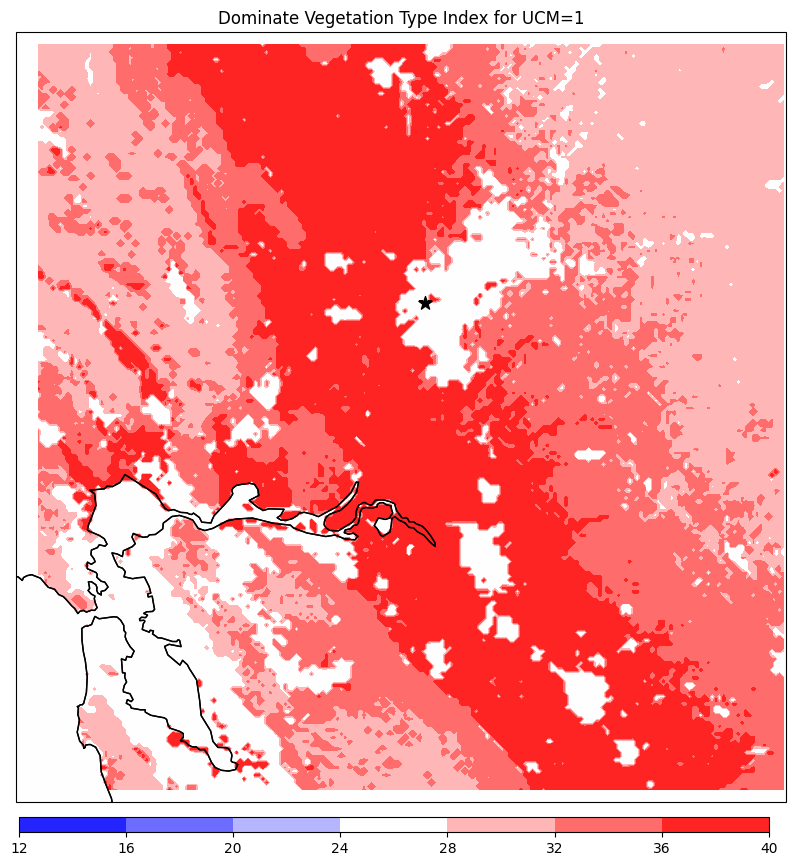

In [43]:
# Open the NetCDF file
ncfile0 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_2way/wrfout_d02_2020-06-17_19:00:00")
ncfile1 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_2way_UCM1/wrfout_d02_2020-06-17_19:00:00")
import numpy as np
unique_vals = np.unique(to_np(getvar(ncfile0, "IVGTYP")))
print("Unique IVGTYP values:", unique_vals)
unique_vals = np.unique(to_np(getvar(ncfile1, "IVGTYP")))
print("Unique IVGTYP values:", unique_vals)
unique_vals = np.unique(to_np(getvar(ncfile0, "LU_INDEX")))
print("Unique LU_INDEX values:", unique_vals)
unique_vals = np.unique(to_np(getvar(ncfile1, "LU_INDEX")))
print("Unique LU_INDEX values:", unique_vals)

Var = "IVGTYP"
VarLabel = "Dominate Vegetation Type Index"
Var1 = getvar(ncfile1, Var)

wrf_proj = get_cartopy(Var1)
lats, lons = latlon_coords(Var1)

# Create figure with minimal whitespace
fig, (ax0) = plt.subplots(1, 1, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.0}, figsize=(10, 10))

#  contour plot for UCM=0
ax0.set_title(VarLabel+ " for UCM=1")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats),to_np(Var1),transform=cp.crs.PlateCarree(), cmap="bwr") 
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())
cbar_ax = fig.add_axes([0.13, 0.08, 0.75, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour0,cax=cbar_ax, orientation="horizontal")
plt.show()

Unique IVGTYP values: [17 24 26 27 28 29 30 32 33 37 38 39 40]
Unique IVGTYP values: [13 17 24 26 27 28 29 30 32 33 37 38 39 40]
Unique LU_INDEX values: [17. 23. 24. 25. 26. 27. 28. 29. 30. 32. 33. 37. 38. 39. 40.]
Unique LU_INDEX values: [13. 17. 23. 24. 25. 26. 27. 28. 29. 30. 32. 33. 37. 38. 39. 40.]


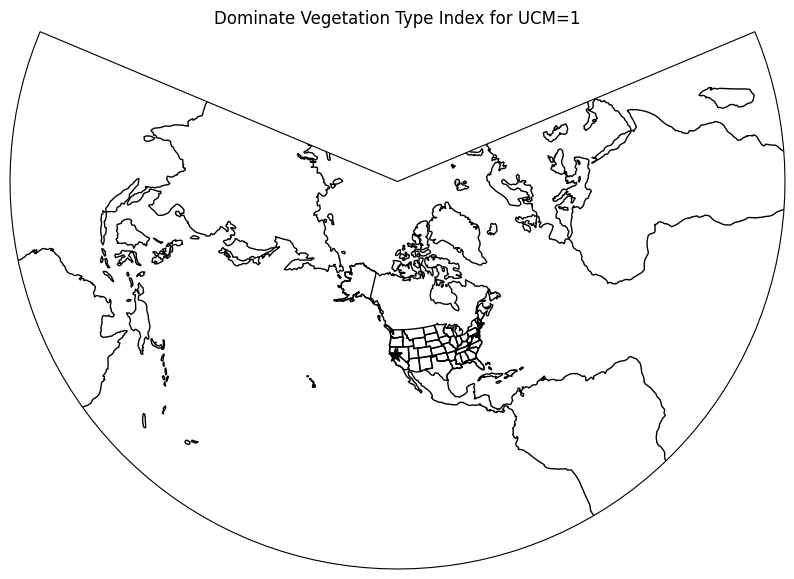

In [70]:
# Open the NetCDF file
ncfile0 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_2way/wrfout_d02_2020-06-17_19:00:00")
ncfile1 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_2way_UCM1/wrfout_d02_2020-06-17_19:00:00")
import numpy as np
unique_vals = np.unique(to_np(getvar(ncfile0, "IVGTYP")))
print("Unique IVGTYP values:", unique_vals)
unique_vals = np.unique(to_np(getvar(ncfile1, "IVGTYP")))
print("Unique IVGTYP values:", unique_vals)
unique_vals = np.unique(to_np(getvar(ncfile0, "LU_INDEX")))
print("Unique LU_INDEX values:", unique_vals)
unique_vals = np.unique(to_np(getvar(ncfile1, "LU_INDEX")))
print("Unique LU_INDEX values:", unique_vals)

Var = "IVGTYP"
VarLabel = "Dominate Vegetation Type Index"
Var1 = getvar(ncfile1, Var)

wrf_proj = get_cartopy(Var1)
lats, lons = latlon_coords(Var1)

# Create figure with minimal whitespace
fig, (ax0) = plt.subplots(1, 1, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.0}, figsize=(10, 10))

#  contour plot for UCM=0
ax0.set_title(VarLabel+ " for UCM=1")
ax0.set_extent([-121.49,-121.49+0.25, 38.58-0.2, 38.58], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats),to_np(Var1),transform=cp.crs.PlateCarree(), cmap="bwr") 
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())
cbar_ax = fig.add_axes([0.13, 0.08, 0.75, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour0,cax=cbar_ax, orientation="horizontal")


plt.show()

In [ ]:
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords
import matplotlib.pyplot as plt
import cartopy as cp
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np

# Open the NetCDF files
ncfile1 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_2way_UCM1/wrfout_d01_2020-06-17_19:00:00")

# Define variable and label
Var = "IVGTYP"
VarLabel = "Dominant Vegetation Type Index"
Var1 = getvar(ncfile1, Var)

# Get projection, lat/lon
wrf_proj = get_cartopy(Var1)
lats, lons = latlon_coords(Var1)

# Define levels (including 13)
levels = list(range(13, 42))  # 13–41
n_levels = len(levels)

# Create a base colormap from 'bwr' with one less color
bwr = plt.get_cmap("bwr", n_levels - 1)
colors = bwr(np.linspace(0, 1, n_levels - 1))

# Insert black at index 0 (for value 13)
colors = np.vstack([[0, 0, 0, 1], colors])  # RGBA for black + rest of bwr
custom_cmap = ListedColormap(colors)

# Define normalization boundaries
norm = BoundaryNorm(boundaries=levels + [levels[-1] + 1], ncolors=n_levels)

# Plot
fig, ax0 = plt.subplots(1, 1, subplot_kw={'projection': wrf_proj}, figsize=(10, 10))
ax0.set_title(VarLabel + " for UCM=1")
extent = [to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()]
transform = cp.crs.PlateCarree()
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())

img = ax0.imshow(to_np(Var1), origin="lower", extent=extent, transform=transform, cmap=custom_cmap, norm=norm)

# Map features
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento", transform=transform)

# Discrete colorbar
cbar_ax = fig.add_axes([0.13, 0.08, 0.75, 0.015])
cbar = fig.colorbar(img, cax=cbar_ax, orientation="horizontal", ticks=levels)
cbar.set_label("Vegetation Type Index")

plt.show()


Unique IVGTYP values: [17 24 26 27 28 29 30 32 33 37 38 39 40]
Unique IVGTYP values: [13 17 24 26 27 28 29 30 32 33 37 38 39 40]
Unique LU_INDEX values: [17. 23. 24. 25. 26. 27. 28. 29. 30. 32. 33. 37. 38. 39. 40.]
Unique LU_INDEX values: [13. 17. 23. 24. 25. 26. 27. 28. 29. 30. 32. 33. 37. 38. 39. 40.]


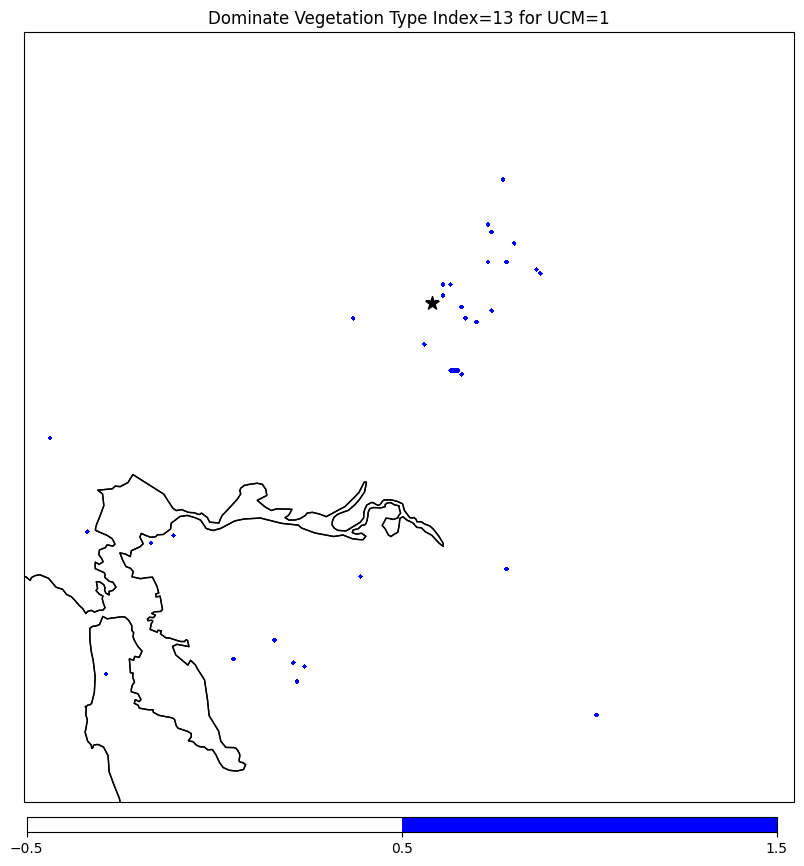

In [44]:
# Open the NetCDF file
ncfile0 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_2way/wrfout_d02_2020-06-17_19:00:00")
ncfile1 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_2way_UCM1/wrfout_d02_2020-06-17_19:00:00")
import numpy as np
unique_vals = np.unique(to_np(getvar(ncfile0, "IVGTYP")))
print("Unique IVGTYP values:", unique_vals)
unique_vals = np.unique(to_np(getvar(ncfile1, "IVGTYP")))
print("Unique IVGTYP values:", unique_vals)
unique_vals = np.unique(to_np(getvar(ncfile0, "LU_INDEX")))
print("Unique LU_INDEX values:", unique_vals)
unique_vals = np.unique(to_np(getvar(ncfile1, "LU_INDEX")))
print("Unique LU_INDEX values:", unique_vals)

Var = "IVGTYP"
VarLabel = "Dominate Vegetation Type Index"
Var1 = getvar(ncfile1, Var)

wrf_proj = get_cartopy(Var1)
lats, lons = latlon_coords(Var1)

# Create figure with minimal whitespace
fig, (ax0) = plt.subplots(1, 1, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.0}, figsize=(10, 10))

#  contour plot for UCM=0
ax0.set_title(VarLabel+ "=13 for UCM=1")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())

# Create a mask: 1 where value is 13, 0 elsewhere
binary_mask = (to_np(Var1) == 13).astype(int)

# Create custom colormap: 0 -> white, 1 -> black
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['white', 'blue'])

# Plot using contourf
contour0 = ax0.contourf(to_np(lons), to_np(lats), binary_mask, 
                        levels=[-0.5, 0.5, 1.5],  # Ensure two levels: 0 and 1
                        transform=cp.crs.PlateCarree(), cmap=custom_cmap)

# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())
cbar_ax = fig.add_axes([0.13, 0.08, 0.75, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour0,cax=cbar_ax, orientation="horizontal")
plt.show()

## Spacer for previous plots
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from wrf import getvar, to_np, get_cartopy, latlon_coords, ll_to_xy, vertcross, interplevel,ALL_TIMES
import cartopy as cp
from glob import glob

# Open the NetCDF file
ncfile0 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_2way/wrfout_d02_2020-06-12_19:00:00")
ncfile1 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_2way_UCM1/wrfout_d02_2020-06-12_19:00:00")
ncfile2 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_UCM2/wrfout_d01_2020-06-12_19:00:00")
ncfile3 = Dataset("/data/wto/WRF/WRFV4.5/test/em_real_UCM3/wrfout_d01_2020-06-12_19:00:00")
#import numpy as np
#unique_lu = np.unique(to_np(getvar(ncfile1, "LU_INDEX")))
#print("Unique LU_INDEX values:", unique_lu)

In [12]:
### Set the Variable you want to look at. ####
Var = "TSK"
VarLabel = "Surface Skin Temperature [K]"
Var0 = getvar(ncfile0, Var)
Var1 = getvar(ncfile1, Var)
Var2 = getvar(ncfile2, Var)
Var3 = getvar(ncfile3, Var)

### Let's plot the difference in the variable with various UCM models (1,2,3) compared to no UCM.

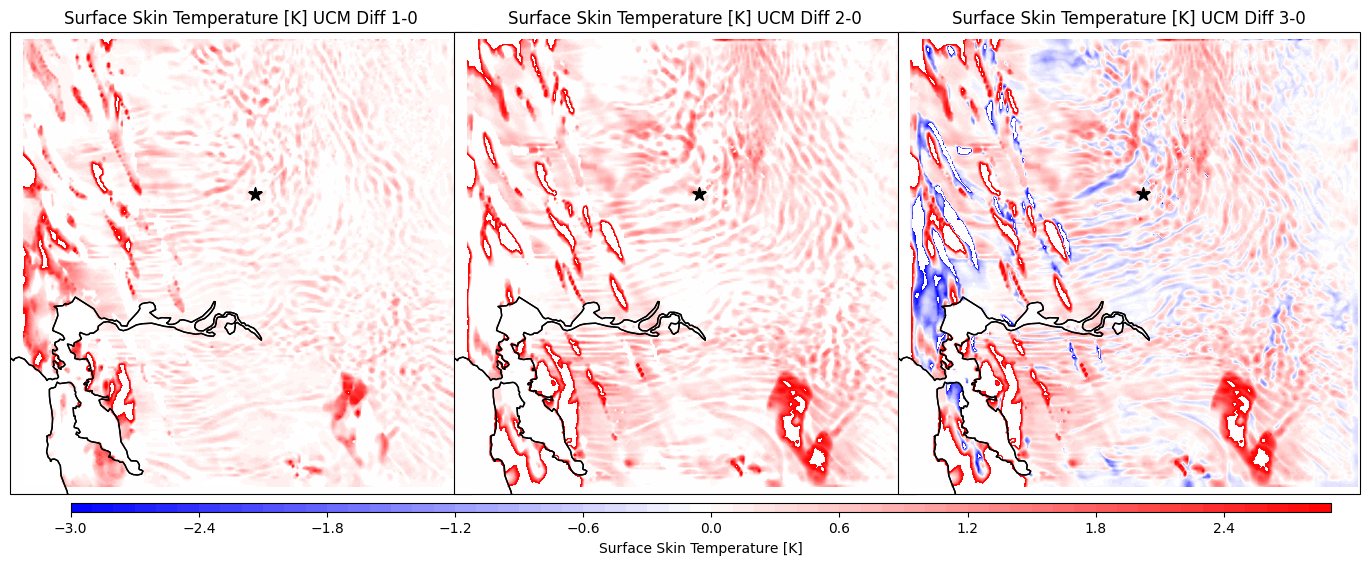

In [13]:

# Get projection and coordinates
wrf_proj = get_cartopy(Var0)
lats, lons = latlon_coords(Var0)


levels = np.arange(-5, 5, 0.1)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(21, 6))

#  contour plot for UCM (1-0)
ax0.set_title(VarLabel+ " UCM Diff 1-0")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
center_lon, center_lat = -121.49, 38.58
lon_min, lon_max = center_lon - 0.3, center_lon + 0.3
lat_min, lat_max = center_lat - 0.25, center_lat + 0.25
#ax0.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var1)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="bwr", levels=levels) 
#, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())


#  contour plot for UCM= (2-0)
ax1.set_title(VarLabel+ " UCM Diff 2-0")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
#ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var2)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="bwr", levels=levels) 
#, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax2.set_title(VarLabel+ " UCM Diff 3-0")
ax2.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
#ax2.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons), to_np(lats), to_np(Var3)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="bwr", levels=levels) 
#, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())


# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.22, 0.08, 0.60, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label(VarLabel)

plt.show()

### Let's Remake the Variable Difference Plots zooming into the Sacramento area

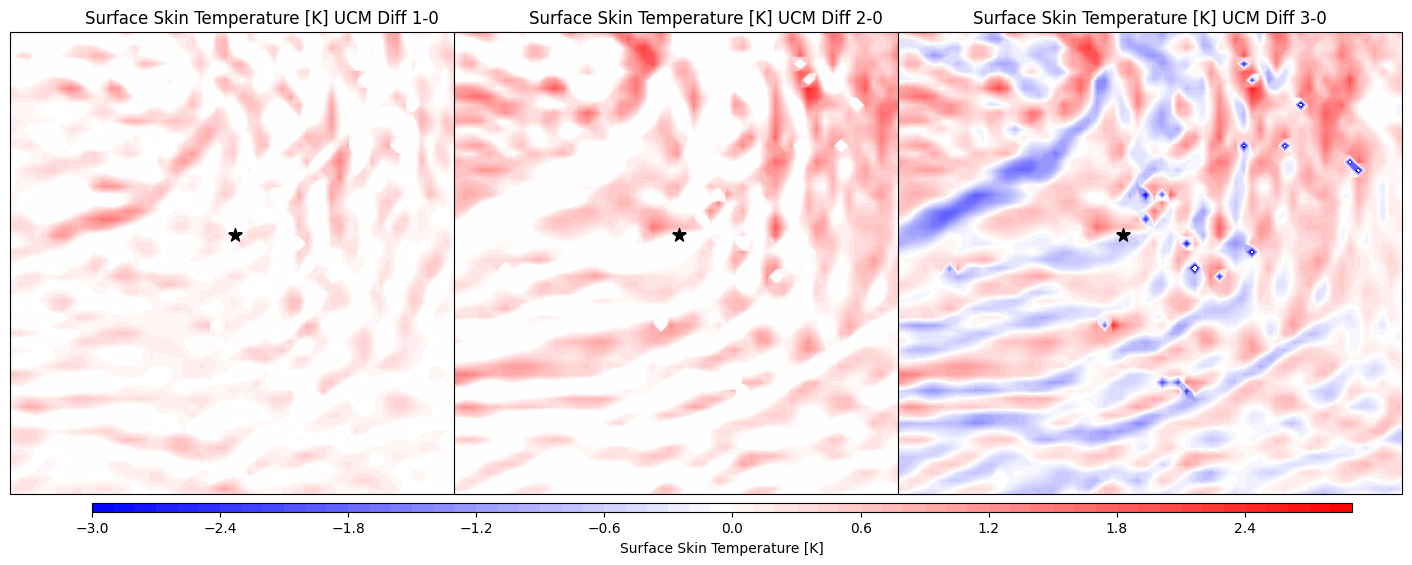

In [14]:
################ Remake the Variable Difference Plots zooming into the Sacramento area ######################
# Get projection and coordinates
wrf_proj = get_cartopy(Var0)
lats, lons = latlon_coords(Var0)



# Create figure with minimal whitespace
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(21, 6))

#  contour plot for UCM (1-0)
ax0.set_title(VarLabel+ " UCM Diff 1-0")
# Zooming into Sacramento.
MyExtent = [-121.8,-121.1,38.3, 38.8]
ax0.set_extent(MyExtent, crs=cp.crs.PlateCarree())
center_lon, center_lat = -121.49, 38.58
lon_min, lon_max = center_lon - 0.3, center_lon + 0.3
lat_min, lat_max = center_lat - 0.25, center_lat + 0.25
#ax0.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var1)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="bwr", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax1.set_title(VarLabel+ " UCM Diff 2-0")
ax1.set_extent(MyExtent, crs=cp.crs.PlateCarree())
#ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var2)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="bwr", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM= (2-0)
ax2.set_title(VarLabel+ " UCM Diff 3-0")
ax2.set_extent(MyExtent, crs=cp.crs.PlateCarree())
#ax2.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons), to_np(lats), to_np(Var3)-to_np(Var0),transform=cp.crs.PlateCarree(), cmap="bwr", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())


# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.22, 0.08, 0.60, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label(VarLabel)

plt.show()

### Plot of the variable's values themselves with difference UCM Modesl (0,1,2,3)

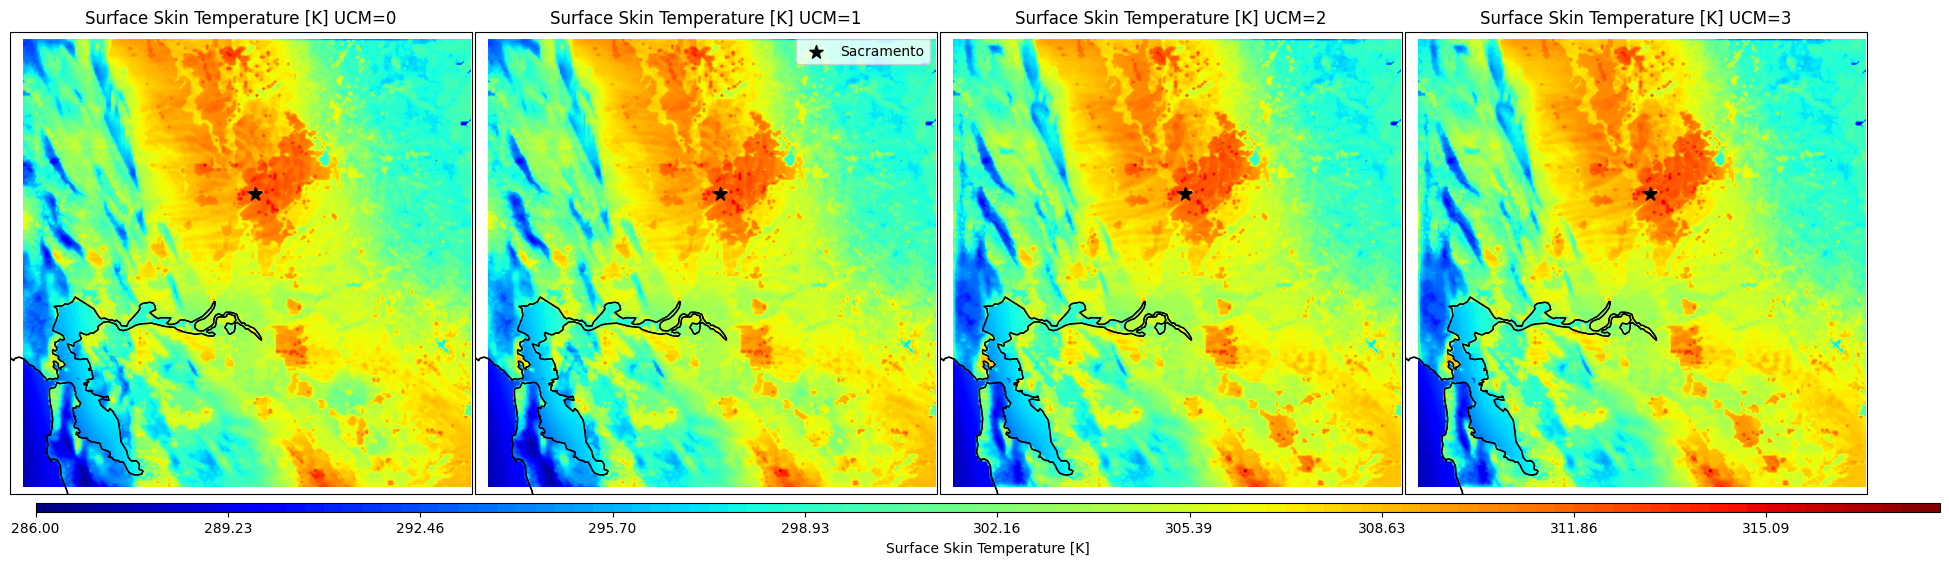

In [9]:
# Get projection and coordinates
wrf_proj = get_cartopy(Var1)
lats, lons = latlon_coords(Var1)
wrf_proj2 = get_cartopy(Var2)
lats2, lons2 = latlon_coords(Var2)

# Set global min/max before plotting to keep colors consistent
vmin = np.floor(min(to_np(Var0).min(), min(to_np(Var2).min(), to_np(Var2).min()), to_np(Var3.min())))
#print(vmin)
vmax = np.ceil(max(to_np(Var0).max(), max(to_np(Var2).max(), to_np(Var2).max()), to_np(Var3.max())))
#print(vmax)
levels = np.linspace(vmin, vmax, 100)

# Create figure with minimal whitespace
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, subplot_kw={'projection': wrf_proj}, 
                               gridspec_kw={'wspace': -0.4}, figsize=(28, 6))

#  contour plot for UCM=0
ax0.set_title(VarEnglish+ " UCM=0")
ax0.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
center_lon, center_lat = -121.49, 38.58
lon_min, lon_max = center_lon - 0.3, center_lon + 0.3
lat_min, lat_max = center_lat - 0.25, center_lat + 0.25
#ax0.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour0 = ax0.contourf(to_np(lons), to_np(lats), to_np(Var0),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax0.add_feature(cp.feature.COASTLINE)
ax0.add_feature(cp.feature.STATES)
ax0.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=1
ax1.set_title(VarEnglish+ " UCM=1")
ax1.set_extent([to_np(lons).min(), to_np(lons).max(), to_np(lats).min(), to_np(lats).max()], crs=cp.crs.PlateCarree())
#ax1.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour1 = ax1.contourf(to_np(lons), to_np(lats), to_np(Var1),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax1.add_feature(cp.feature.COASTLINE)
ax1.add_feature(cp.feature.STATES)
ax1.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())
ax1.legend()

#  contour plot for UCM=2
ax2.set_title(VarEnglish+ " UCM=2")
ax2.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
#ax2.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour2 = ax2.contourf(to_np(lons2), to_np(lats2), to_np(Var2),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax2.add_feature(cp.feature.COASTLINE)
ax2.add_feature(cp.feature.STATES)
ax2.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

#  contour plot for UCM=3
ax3.set_title(VarEnglish+ " UCM=3")
ax3.set_extent([to_np(lons2).min(), to_np(lons2).max(), to_np(lats2).min(), to_np(lats2).max()], crs=cp.crs.PlateCarree())
#ax3.set_extent([lon_min, lon_max, lat_min, lat_max], crs=cp.crs.PlateCarree())
contour3 = ax3.contourf(to_np(lons2), to_np(lats2), to_np(Var3),transform=cp.crs.PlateCarree(), cmap="jet", levels=levels) #, vmin=vmin, vmax=vmax)
# Add geographical features and a star marker for Sacramento
ax3.add_feature(cp.feature.COASTLINE)
ax3.add_feature(cp.feature.STATES)
ax3.scatter(-121.49, 38.58, color='black', marker='*', s=100, label="Sacramento",transform=cp.crs.PlateCarree())

# Add shared colorbar spanning only the width of both plots
cbar_ax = fig.add_axes([0.19, 0.08, 0.68, 0.015])  # [left, bottom, width, height]
cbar = fig.colorbar(contour1, cax=cbar_ax, orientation="horizontal")
cbar.set_label(VarEnglish)

plt.show()

### Plot of the time series for the temperature at the EPA Station

In [10]:
# === Location of the EPA site===
lat_point = 38.593322
lon_point = -121.503795

# === Load all WRF output files ===
data_path0 = "/data/wto/WRF/WRFV4.5/test/em_real_2way/"  # Update if needed
file_pattern0 = "wrfout_d02_2020-06-*"
files0 = sorted(glob(f"{data_path0}/{file_pattern0}"))

data_path1 = "/data/wto/WRF/WRFV4.5/test/em_real_2way_UCM1/"  # Update if needed
file_pattern1 = "wrfout_d02_2020-06-*"
files1 = sorted(glob(f"{data_path1}/{file_pattern1}"))

data_path2 = "/data/wto/WRF/WRFV4.5/test/em_real_UCM2/"  # Update if needed
file_pattern2 = "wrfout_d01_2020-06-*"
files2 = sorted(glob(f"{data_path2}/{file_pattern2}"))

data_path3 = "/data/wto/WRF/WRFV4.5/test/em_real_UCM3/"  # Update if needed
file_pattern3 = "wrfout_d01_2020-06-*"
files3 = sorted(glob(f"{data_path3}/{file_pattern3}"))

# === Use first file to find grid location ===
sample_ds = Dataset(files0[0])
xy_loc = ll_to_xy(sample_ds, lat_point, lon_point, as_int=True)
x_idx, y_idx = int(xy_loc[0]), int(xy_loc[1])

# === Extract and accumulate T2 at the target location ===
Var_all_UCM0 = []
Var_all_UCM1 = []
Var_all_UCM2 = []
Var_all_UCM3 = []
Time_all = []

for ifile in range(0,len(files1)):

    Var_UCM0 = getvar(Dataset(files0[ifile]), Var, timeidx=ALL_TIMES)  # May return 2D or 3D
    Var_all_UCM0.extend(to_np([Var_UCM0[y_idx, x_idx] - 273.15]))
    Time_all.append(Var_UCM0.Time.values)
    
    Var_UCM1 = getvar(Dataset(files1[ifile]), Var, timeidx=ALL_TIMES)  # May return 2D or 3D
    Var_all_UCM1.extend(to_np([Var_UCM1[y_idx, x_idx] - 273.15]))
    
    Var_UCM2 = getvar(Dataset(files2[ifile]), Var, timeidx=ALL_TIMES)  # May return 2D or 3D
    Var_all_UCM2.extend(to_np([Var_UCM2[y_idx, x_idx] - 273.15]))
    
    Var_UCM3 = getvar(Dataset(files3[ifile]), Var, timeidx=ALL_TIMES)  # May return 2D or 3D
    Var_all_UCM3.extend(to_np([Var_UCM3[y_idx, x_idx] - 273.15]))
    
#### Setup the figures and axes.
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=False)

#### Top subplot (first half)
axs[0].plot(Time_all[0:359], Var_all_UCM0[0:359],linewidth=4, label="WRF UCM-0", color='tab:blue')
axs[0].plot(Time_all[0:359], Var_all_UCM1[0:359],linewidth=3,  label="WRF UCM-1", color='tab:red')
axs[0].plot(Time_all[0:359], Var_all_UCM2[0:359],linewidth=2,  label="WRF UCM-2", color='tab:green')
axs[0].plot(Time_all[0:359], Var_all_UCM3[0:359],linewidth=1,  label="WRF UCM-3", color='tab:orange')
#axs[0].plot(times[0:359], TempC[0:359], '.k', label="T(°C) EPA Data")
axs[0].set_ylabel(VarLabel)
axs[0].set_title(VarLabel +" at 38.593322, -121.503795")
axs[0].grid(True)
axs[0].legend()

# Bottom subplot (second half)
axs[1].plot(Time_all[359:718], Var_all_UCM0[359:718],linewidth=4, label="WRF UCM-0", color='tab:blue')
axs[1].plot(Time_all[359:718], Var_all_UCM1[359:718],linewidth=3, label="WRF UCM-1", color='tab:red')
axs[1].plot(Time_all[359:718], Var_all_UCM2[359:718],linewidth=2, label="WRF UCM-2", color='tab:green')
axs[1].plot(Time_all[359:718], Var_all_UCM3[359:718],linewidth=1, label="WRF UCM-3", color='tab:orange')
#axs[1].plot(times[359:718], TempC[359:718], '.k', label="T(°C) EPA Data")
axs[1].set_xlabel("Time")
axs[1].set_ylabel(VarLabel)
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

IndexError: list index out of range